<a href="https://colab.research.google.com/github/karnika-8171/Data-Analysis/blob/main/EDA_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
from google.colab import files
uploaded = files.upload()


Saving Delinquency_prediction_dataset_to_be_used.csv to Delinquency_prediction_dataset_to_be_used (2).csv


To upload a file to your Colab notebook, click the folder icon on the left sidebar. Then, click the "Upload" icon and select the CSV file you want to upload from your local machine.

In [25]:
import pandas as pd

# Replace 'your_file_name.csv' with the actual name of your uploaded file
df = pd.read_csv('Delinquency_prediction_dataset_to_be_used (1).csv')
# Display the first 5 rows of the DataFrame
display(df.head())

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0,16310.0,0.317396,EMP,18,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1,17401.0,0.196093,Self-employed,0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0,13761.0,0.301655,Self-employed,1,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0,88778.0,0.264794,Unemployed,15,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0,13316.0,0.510583,Self-employed,11,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Customer_ID           500 non-null    object 
 1   Age                   500 non-null    int64  
 2   Income                461 non-null    float64
 3   Credit_Score          498 non-null    float64
 4   Credit_Utilization    500 non-null    float64
 5   Missed_Payments       500 non-null    int64  
 6   Delinquent_Account    500 non-null    int64  
 7   Loan_Balance          471 non-null    float64
 8   Debt_to_Income_Ratio  500 non-null    float64
 9   Employment_Status     500 non-null    object 
 10  Account_Tenure        500 non-null    int64  
 11  Credit_Card_Type      500 non-null    object 
 12  Location              500 non-null    object 
 13  Month_1               500 non-null    object 
 14  Month_2               500 non-null    object 
 15  Month_3               5

In [27]:
df.shape

(500, 19)

In [28]:
missing=df.isnull().sum().to_frame("Missing_Count")
print(missing)

                      Missing_Count
Customer_ID                       0
Age                               0
Income                           39
Credit_Score                      2
Credit_Utilization                0
Missed_Payments                   0
Delinquent_Account                0
Loan_Balance                     29
Debt_to_Income_Ratio              0
Employment_Status                 0
Account_Tenure                    0
Credit_Card_Type                  0
Location                          0
Month_1                           0
Month_2                           0
Month_3                           0
Month_4                           0
Month_5                           0
Month_6                           0


In [29]:
missing['Missing %'] = (missing['Missing_Count'] / len(df) * 100).round(2)
missing = missing.sort_values('Missing %', ascending=False)
display(missing.head(20))



,Missing_Count,Missing %
Income,39,7.8
Loan_Balance,29,5.8
Credit_Score,2,0.4
Age,0,0.0
Customer_ID,0,0.0
Missed_Payments,0,0.0
Credit_Utilization,0,0.0
Delinquent_Account,0,0.0
Debt_to_Income_Ratio,0,0.0
Employment_Status,0,0.0


In [30]:
# ✅ Outlier Detection using IQR — Safe Version
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

summary = []

for col in numeric_cols:
    # Check if column has enough data
    if df[col].notnull().sum() > 0:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr
        outliers = ((df[col] > upper) | (df[col] < lower)).sum()
        summary.append([col, outliers, upper.round(2), lower.round(2)])

# Make a DataFrame
outlier_df = pd.DataFrame(summary, columns=['Column', 'Outlier Count', 'Upper Bound', 'Lower Bound'])

# Display top 10 columns with the most outliers
outlier_df.sort_values('Outlier Count', ascending=False).head(10)


,Column,Outlier Count,Upper Bound,Lower Bound
5,Delinquent_Account,80,0.00,0.00
0,Age,0,98.62,-6.38
1,Income,0,295892.50,-77863.50
3,Credit_Utilization,0,1.05,-0.06
2,Credit_Score,0,1190.75,-45.25
4,Missed_Payments,0,11.00,-5.00
6,Loan_Balance,0,153291.50,-54028.50
7,Debt_to_Income_Ratio,0,0.56,0.04
8,Account_Tenure,0,30.00,-10.00


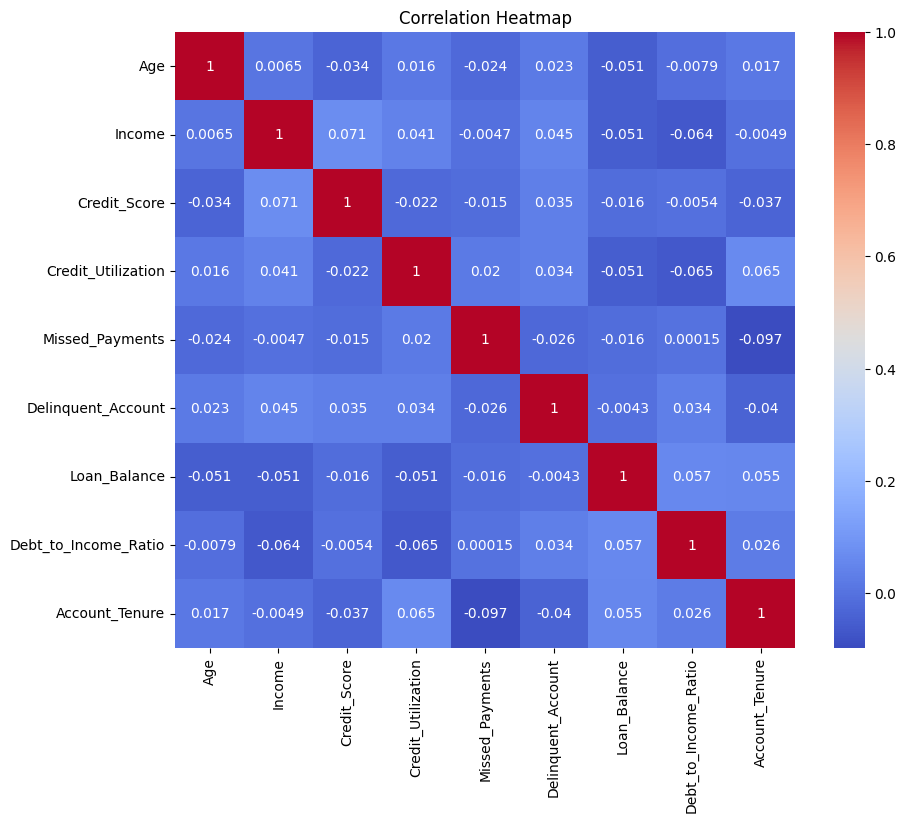

In [31]:
# Correlation Heatmap for Numeric Features
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [37]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.impute import SimpleImputer


# 2. Load your dataset
# df = pd.read_csv("Delinquency_prediction_dataset_to_be_used (1).csv")  # Replace with your file name
# The dataframe is already loaded, so no need to load it again.

# 3. Select features and target
features = ['Credit_Utilization', 'Income', 'Loan_Balance', 'Missed_Payments', 'Debt_to_Income_Ratio']
X = df[features]
y = df['Delinquent_Account']  # Target column

# 4. Handle missing values
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)


# 5. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 7. Predict and evaluate
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # For AUC

# 8. Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC-ROC:", roc_auc_score(y_test, y_prob))

Accuracy: 0.86
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
AUC-ROC: 0.49252491694352163


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


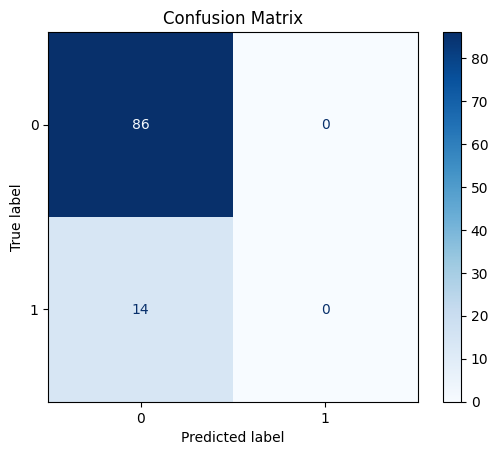

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


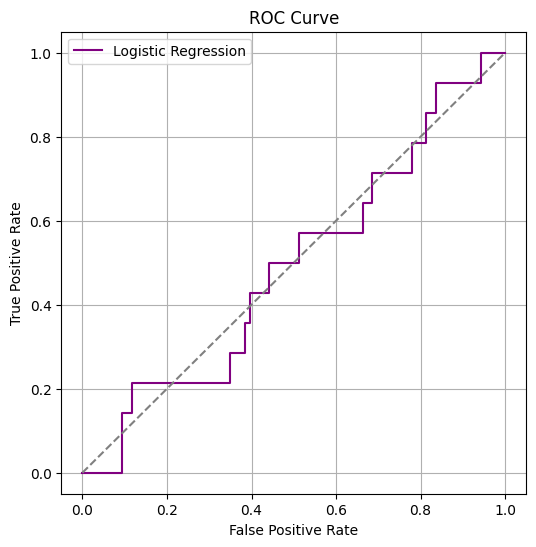

In [39]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='Logistic Regression', color='purple')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


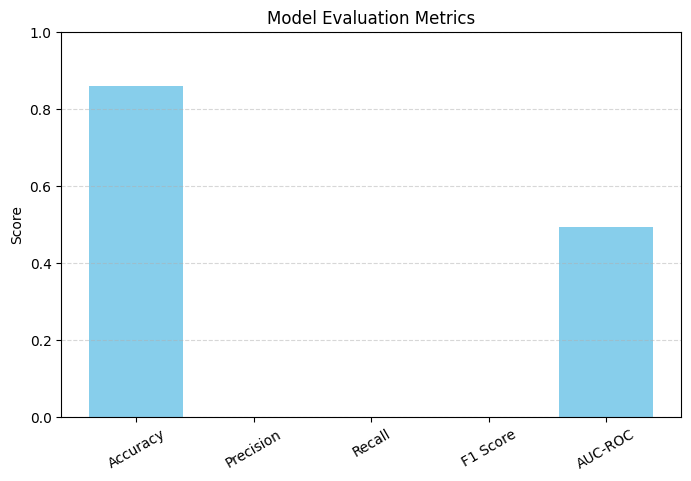

In [40]:
import matplotlib.pyplot as plt

# Define metrics
scores = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1 Score': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc_score(y_test, y_prob)
}

# Plot
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylim(0, 1)
plt.title("Model Evaluation Metrics")
plt.ylabel("Score")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()
